In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
df_estacao = pd.read_csv("DATA/dados_estacoes_2015-2017.csv",
        parse_dates=["DATE"],
        index_col=["DATE"])

df_radar = pd.read_csv("DATA/radar.csv",
                      parse_dates=['date'],
                      index_col=["date"])

In [21]:
df_estacao.sort_index().index.to_series().describe()

count                        1741022
unique                       1740045
top              2018-02-01 05:34:00
freq                               2
first            2015-01-01 00:00:00
last      2018-04-23 23:59:02.900000
Name: DATE, dtype: object

In [22]:
df_radar.sort_index().index.to_series().describe()

count                   65581
unique                  65581
top       2016-03-22 14:15:00
freq                        1
first     2016-01-01 00:05:00
last      2018-06-13 23:55:00
Name: date, dtype: object

In [13]:
def compare(station,period,df_estacao,df_radar, df_return= False):
    
    lr = linear_model.LinearRegression()
    
    df_estacao_freg = df_estacao.groupby(pd.Grouper(freq=period)).sum()
    df_radar_freg = df_radar.groupby(pd.Grouper(freq=period)).sum()
    
    df_estacao_station = df_estacao_freg[station]
    df_radar_station = df_radar_freg[station]
    
    df_estacao_station = df_estacao_station.rename(station + "_ESTACAO")
    df_radar_station = df_radar_station.rename(station + "_RADAR")
    
    
    df = pd.concat([df_estacao_station,df_radar_station],axis=1)
    
    df.dropna(inplace=True)

    X = df.values[:,-1:]
    y = df.values[:,:-1]
    y = y.reshape(-1,)

    lr.fit(X,y)
   
    y_pred = lr.predict(X)
    
    # The coefficients
    print('Coefficients: \n', lr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('R2 score: %.2f' % r2_score(y, y_pred))
    
    plt.figure(1, figsize=(15,5))
    plt.suptitle("Valores acumulados por {} na Estação {}".format(period,station), fontsize=16)
    
    plt.subplot(121)
    plt.plot(df[station + "_ESTACAO"],alpha=1, color='b',label="ESTAÇÃO")
    plt.plot(df[station + "_RADAR"],alpha=0.6, color='orange',label="RADAR")
    #plt.yscale("log")
    plt.ylabel("Valores Radar")
    plt.legend()
    

    plt.subplot(122)
    plt.ylim(bottom=-1, top=60)
    plt.scatter(df[station + "_RADAR"],df[station + "_ESTACAO"])
    plt.plot(X,y_pred,color='black', linewidth=1)
    plt.xlabel("RADAR")
    plt.ylabel("ESTAÇÃO")
    

    plt.show()
    if df_return:
        return df
    
    

Coefficients: 
 [0.56352367]
Mean squared error: 46.69
R2 score: 0.46


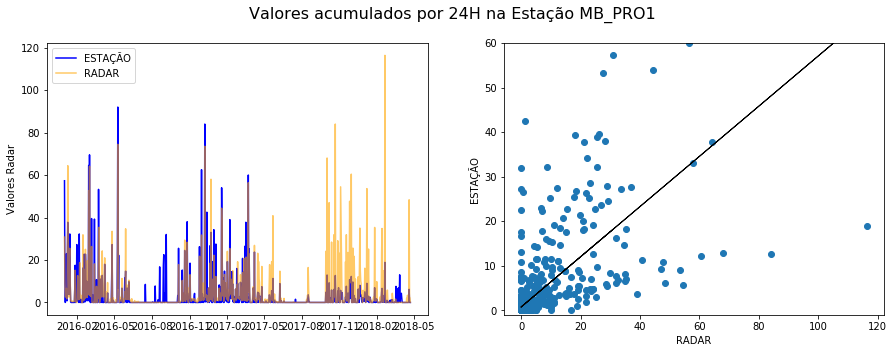

In [33]:
compare("MB_PRO1","24H",df_estacao,df_radar)

Coefficients: 
 [-0.]
Mean squared error: 0.00
R2 score: 1.00


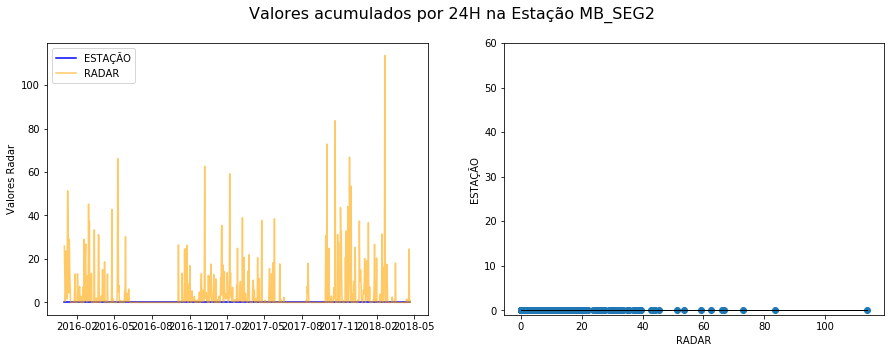

Coefficients: 
 [5.83075015e-06]
Mean squared error: 0.00
R2 score: 0.00


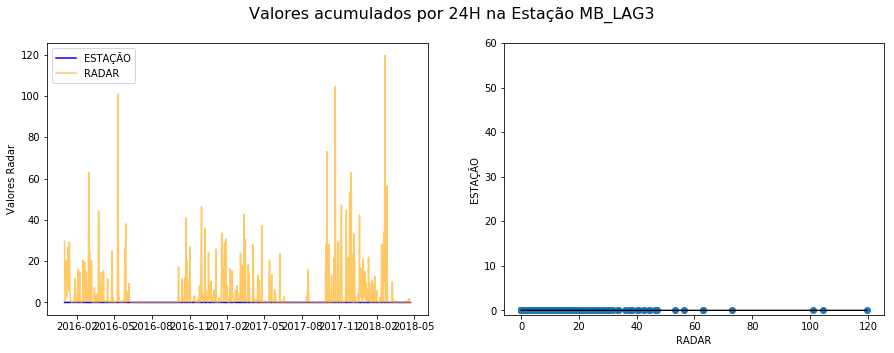

Coefficients: 
 [0.13498348]
Mean squared error: 23.02
R2 score: 0.07


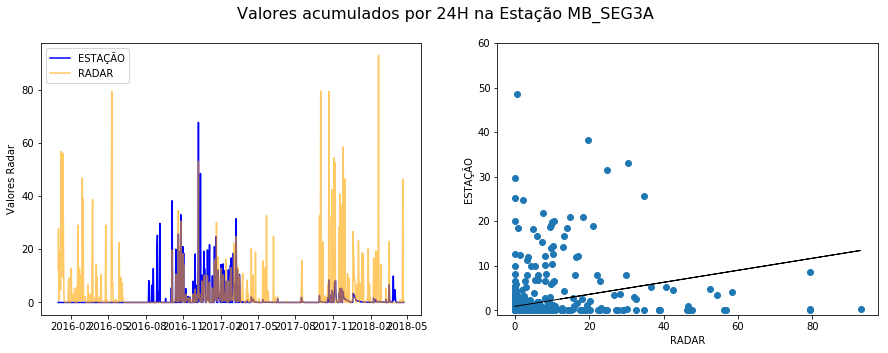

Coefficients: 
 [0.04927927]
Mean squared error: 1.88
R2 score: 0.13


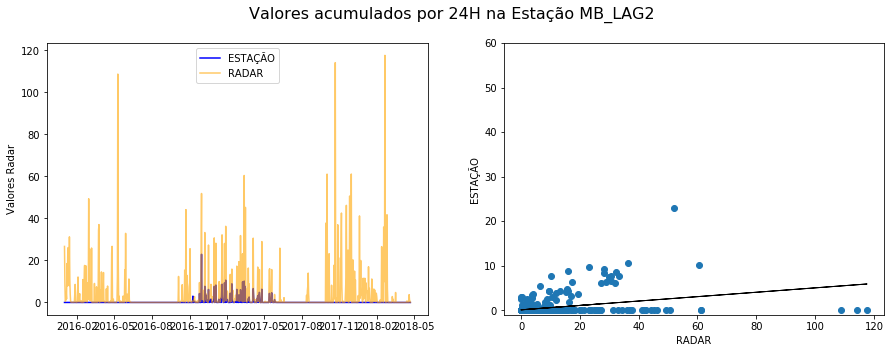

Coefficients: 
 [3.38212562e-06]
Mean squared error: 0.00
R2 score: 0.00


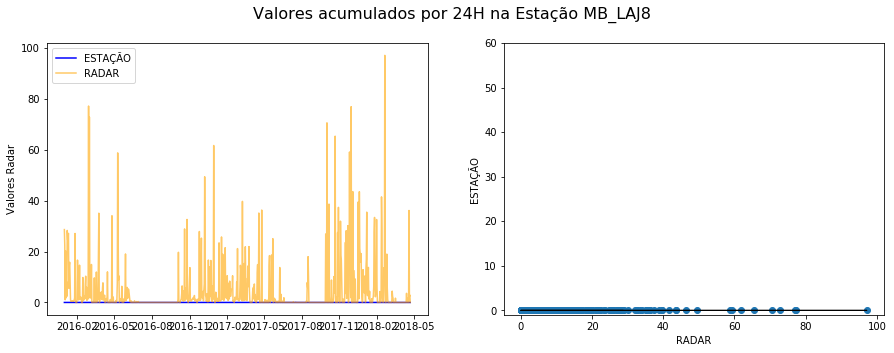

Coefficients: 
 [0.00031394]
Mean squared error: 0.01
R2 score: 0.00


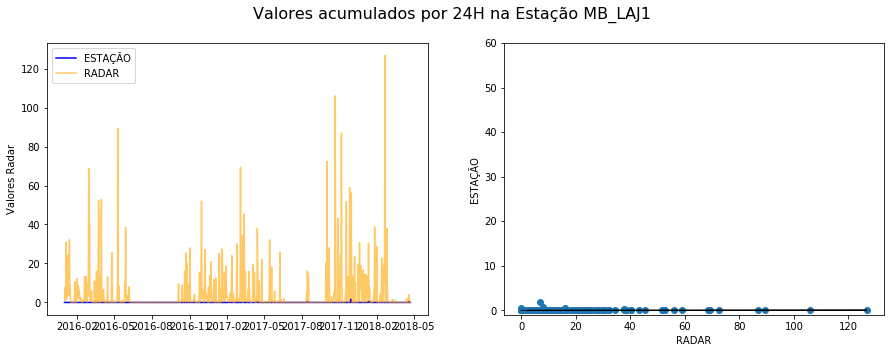

Coefficients: 
 [0.01917005]
Mean squared error: 1.91
R2 score: 0.02


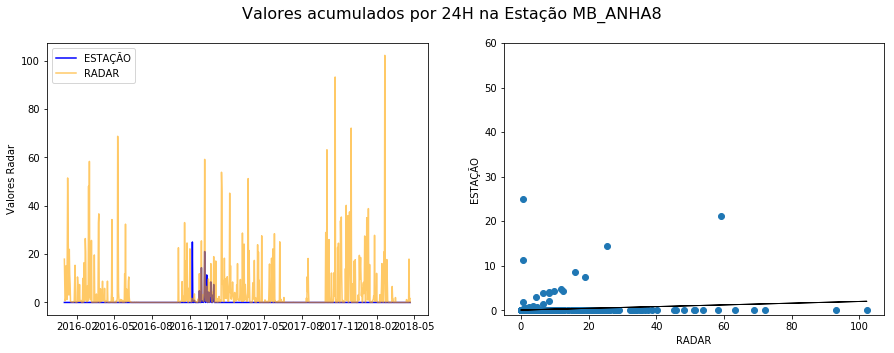

Coefficients: 
 [0.00019969]
Mean squared error: 0.00
R2 score: 0.00


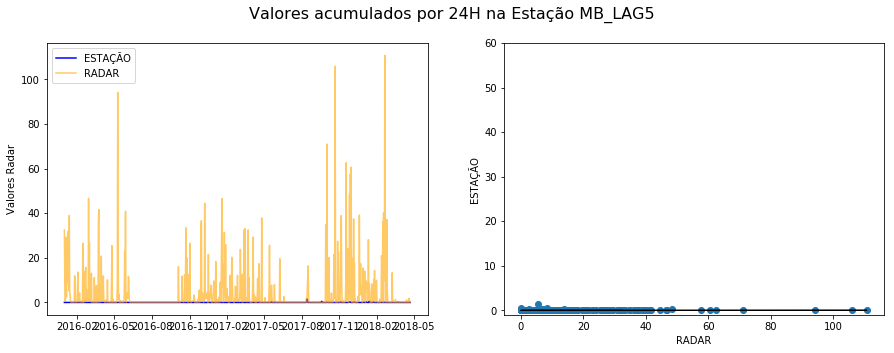

Coefficients: 
 [0.10792169]
Mean squared error: 16.33
R2 score: 0.08


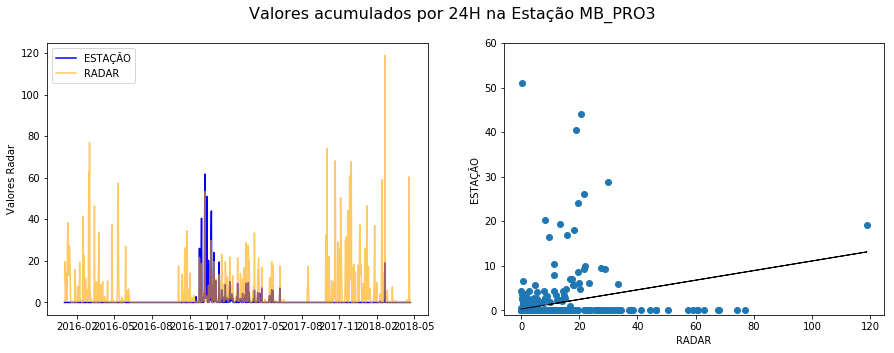

Coefficients: 
 [0.00100022]
Mean squared error: 0.01
R2 score: 0.01


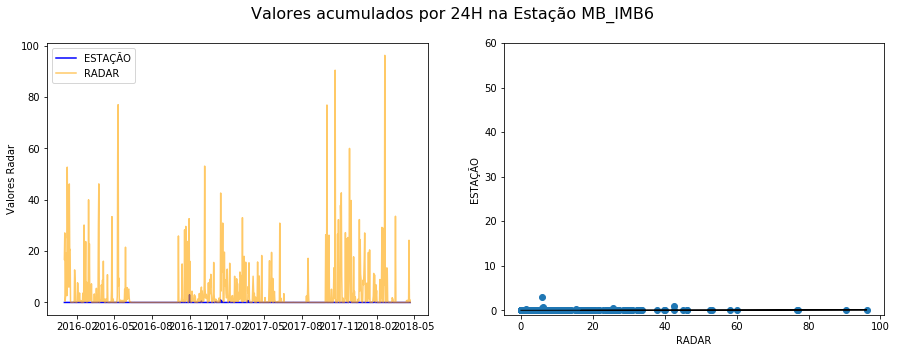

Coefficients: 
 [0.05290219]
Mean squared error: 0.57
R2 score: 0.37


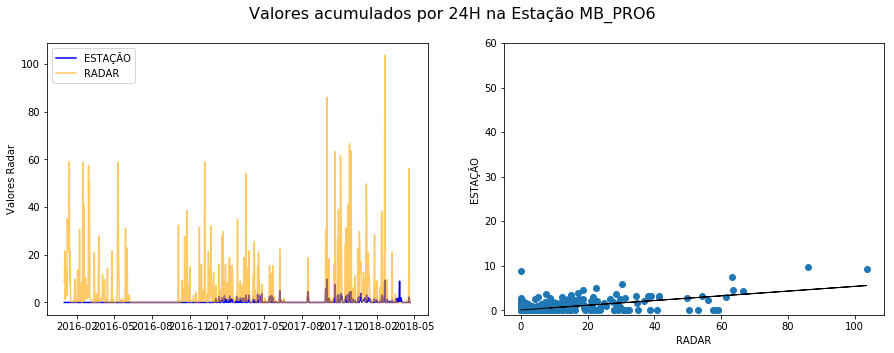

Coefficients: 
 [0.21012966]
Mean squared error: 41.39
R2 score: 0.11


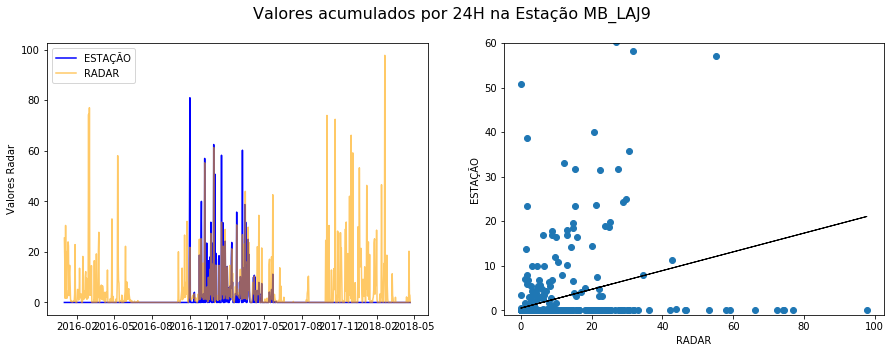

Coefficients: 
 [0.05712391]
Mean squared error: 2.33
R2 score: 0.15


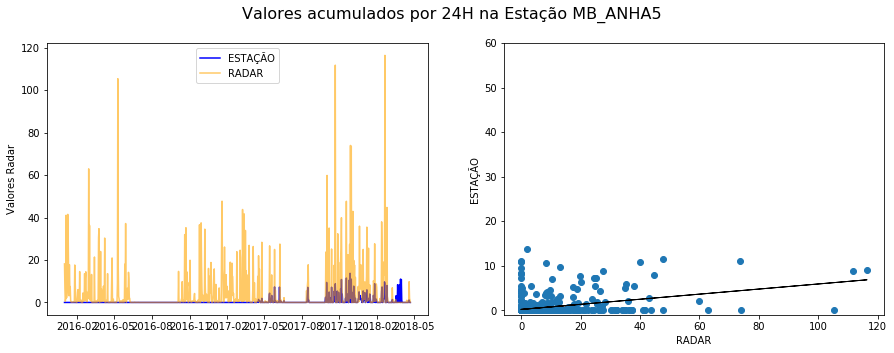

Coefficients: 
 [0.10857788]
Mean squared error: 2.28
R2 score: 0.44


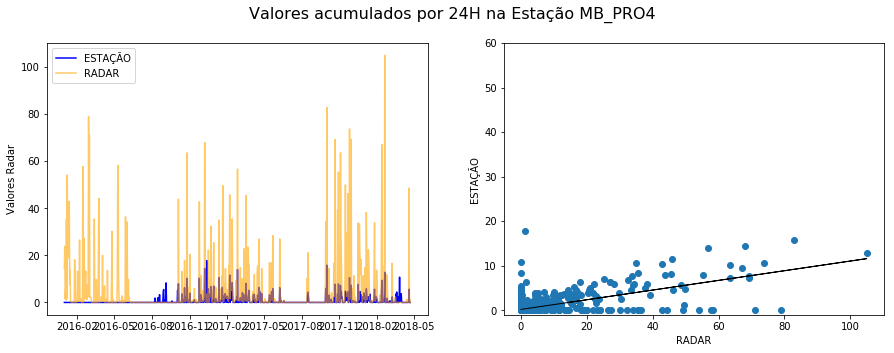

Coefficients: 
 [0.10783175]
Mean squared error: 17.82
R2 score: 0.07


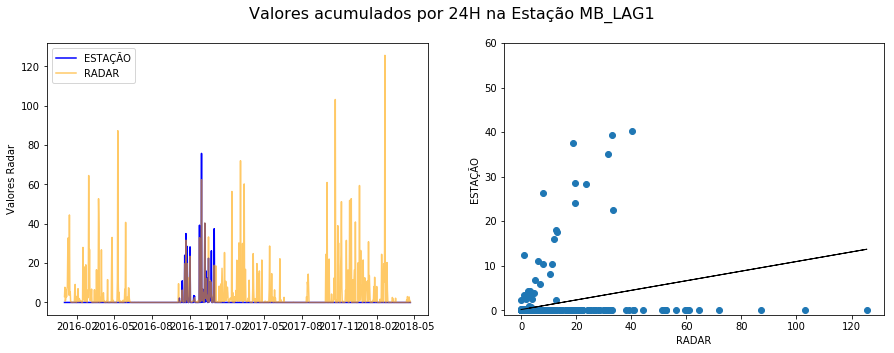

Coefficients: 
 [-0.]
Mean squared error: 0.00
R2 score: 1.00


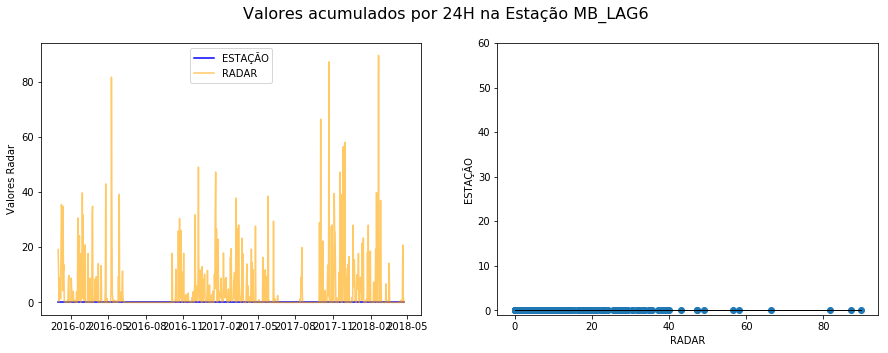

Coefficients: 
 [0.08388201]
Mean squared error: 2.59
R2 score: 0.22


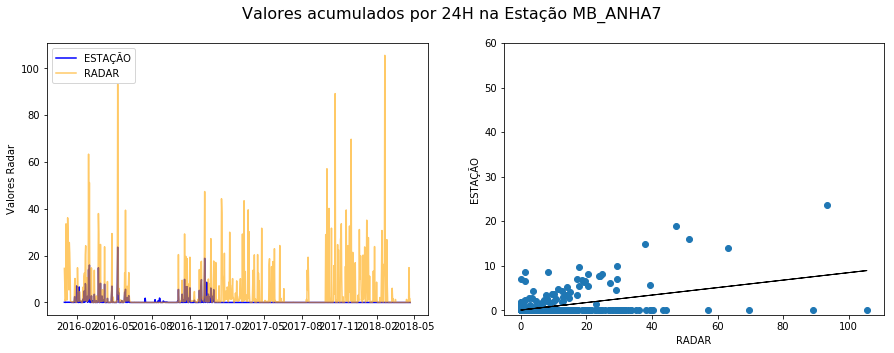

Coefficients: 
 [-0.]
Mean squared error: 0.00
R2 score: 1.00


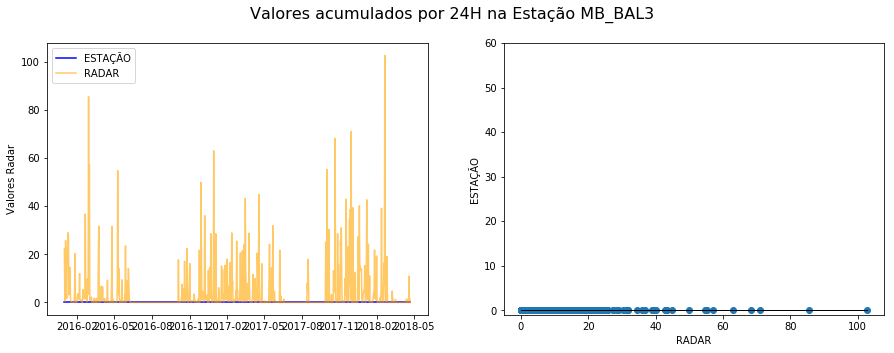

Coefficients: 
 [0.33671369]
Mean squared error: 51.84
R2 score: 0.23


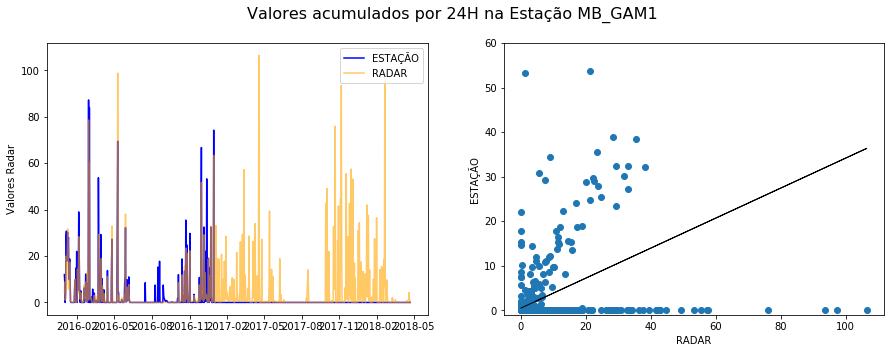

Coefficients: 
 [-0.]
Mean squared error: 0.00
R2 score: 1.00


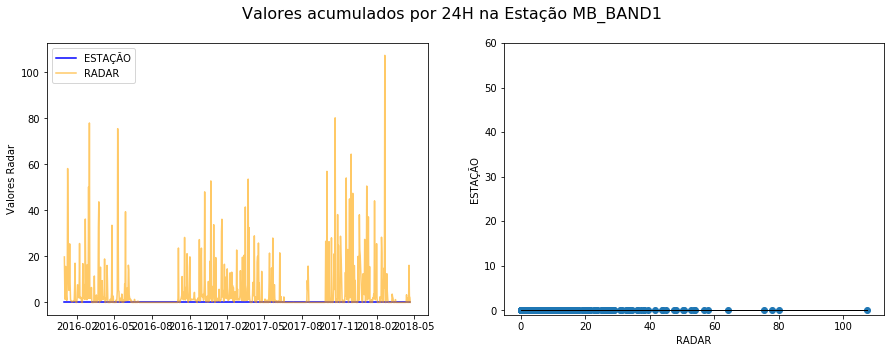

Coefficients: 
 [0.56352367]
Mean squared error: 46.69
R2 score: 0.46


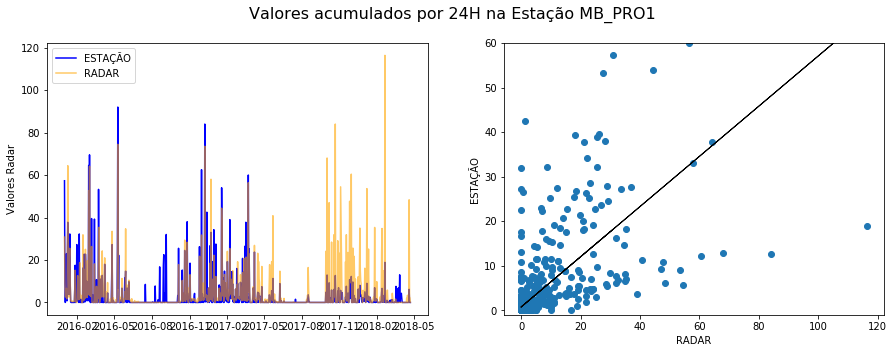

Coefficients: 
 [0.34801457]
Mean squared error: 47.74
R2 score: 0.22


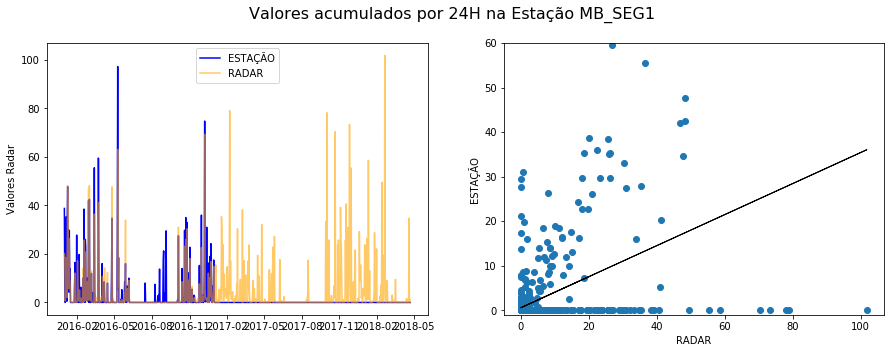

Coefficients: 
 [0.25391529]
Mean squared error: 33.54
R2 score: 0.18


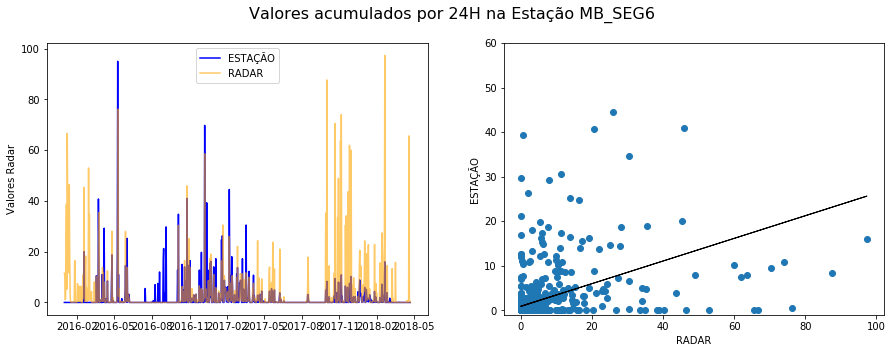

Coefficients: 
 [0.40488409]
Mean squared error: 67.38
R2 score: 0.21


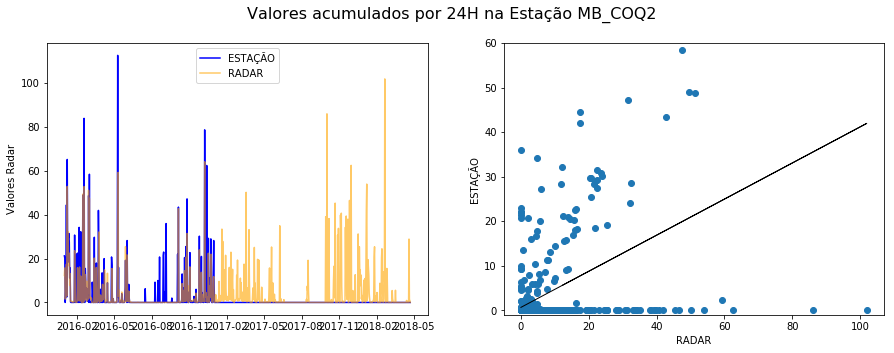

Coefficients: 
 [0.26668311]
Mean squared error: 27.05
R2 score: 0.24


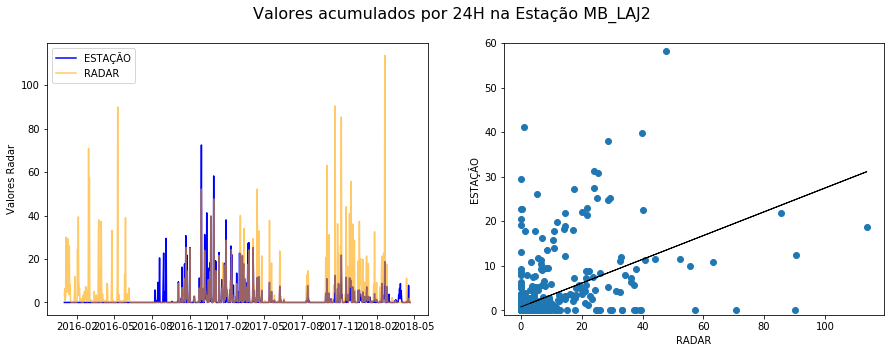

Coefficients: 
 [0.25321589]
Mean squared error: 27.72
R2 score: 0.20


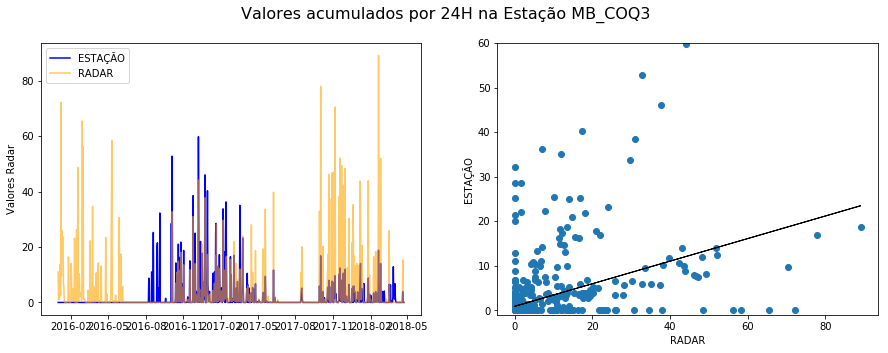

Coefficients: 
 [0.10425281]
Mean squared error: 1.78
R2 score: 0.41


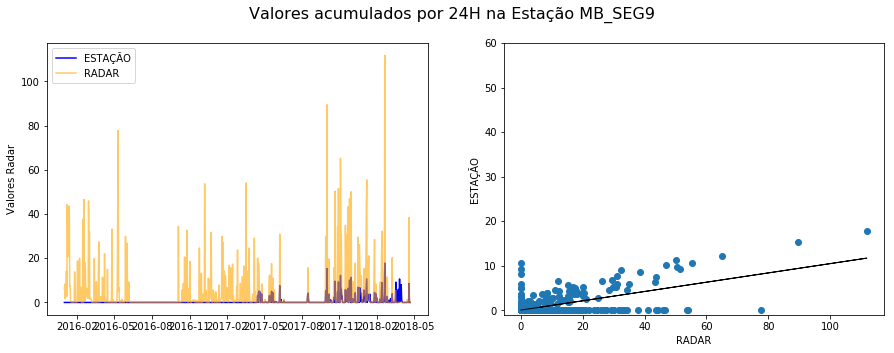

Coefficients: 
 [0.14122202]
Mean squared error: 82.11
R2 score: 0.02


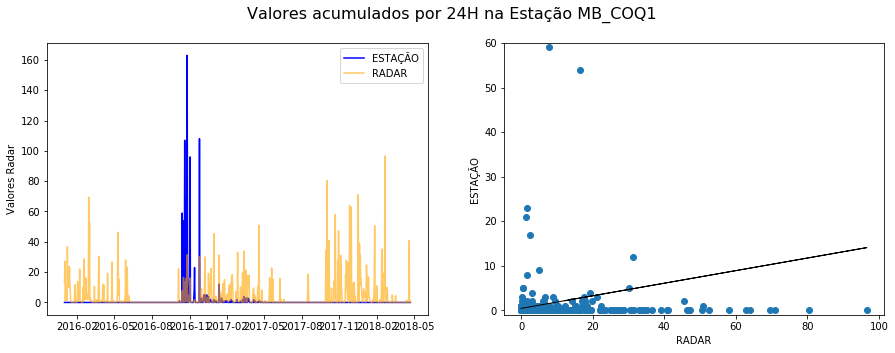

Coefficients: 
 [0.00137537]
Mean squared error: 0.04
R2 score: 0.01


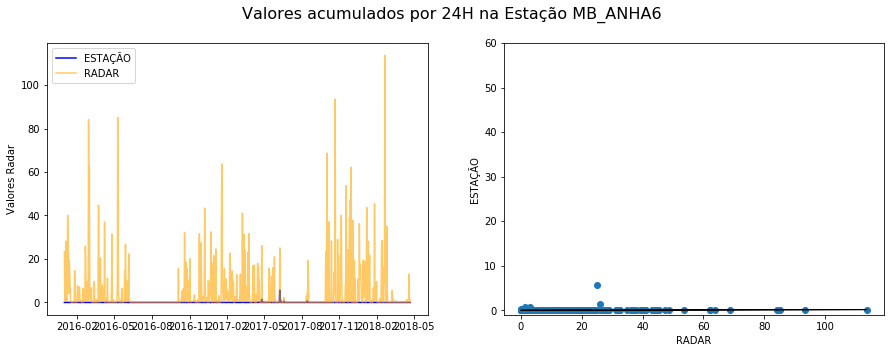

Coefficients: 
 [0.15578926]
Mean squared error: 25.81
R2 score: 0.11


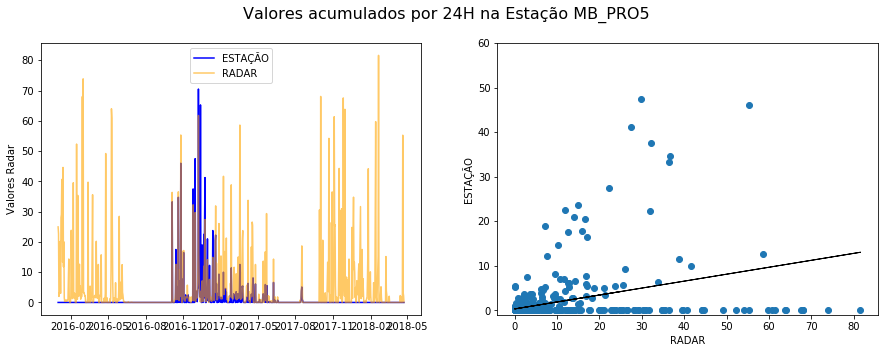

Coefficients: 
 [0.04280316]
Mean squared error: 2.05
R2 score: 0.09


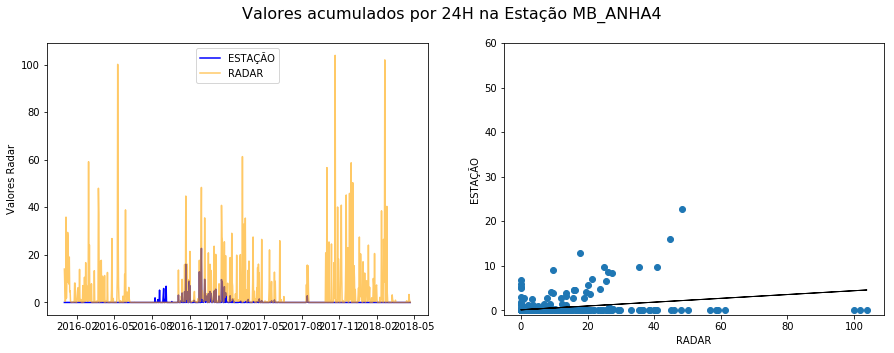

Coefficients: 
 [0.03886398]
Mean squared error: 1.65
R2 score: 0.10


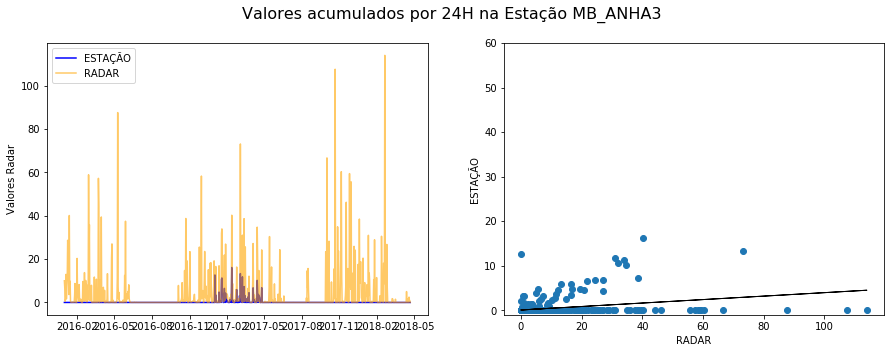

Coefficients: 
 [0.32269838]
Mean squared error: 45.48
R2 score: 0.22


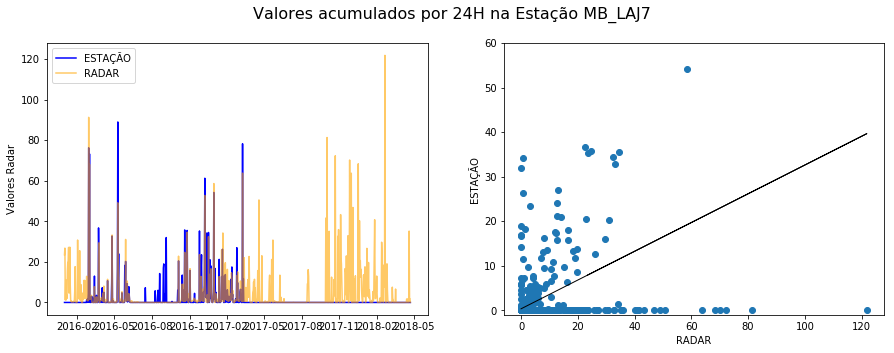

Coefficients: 
 [0.20821025]
Mean squared error: 19.81
R2 score: 0.21


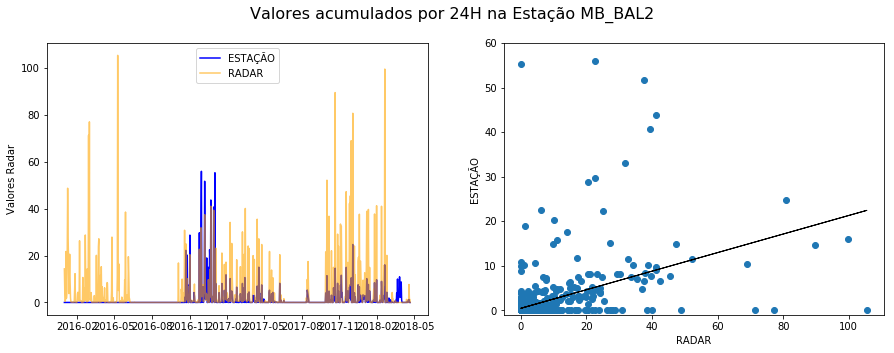

Coefficients: 
 [0.04786421]
Mean squared error: 2.11
R2 score: 0.11


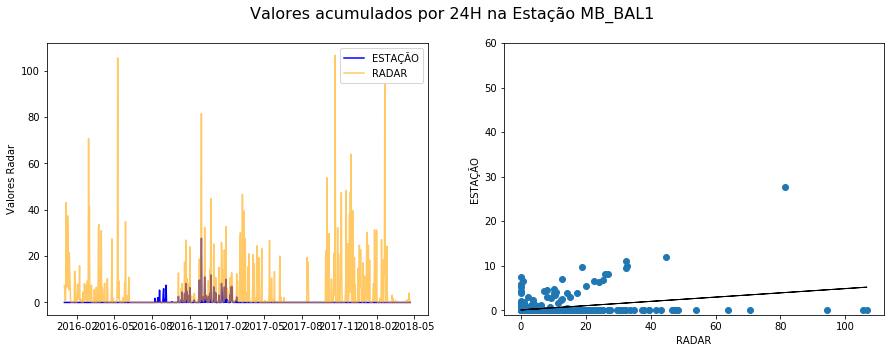

Coefficients: 
 [0.12728153]
Mean squared error: 19.88
R2 score: 0.09


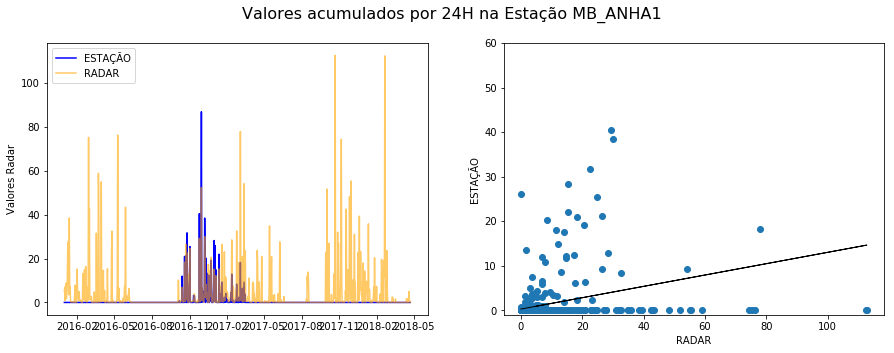

Coefficients: 
 [0.6306228]
Mean squared error: 485.91
R2 score: 0.09


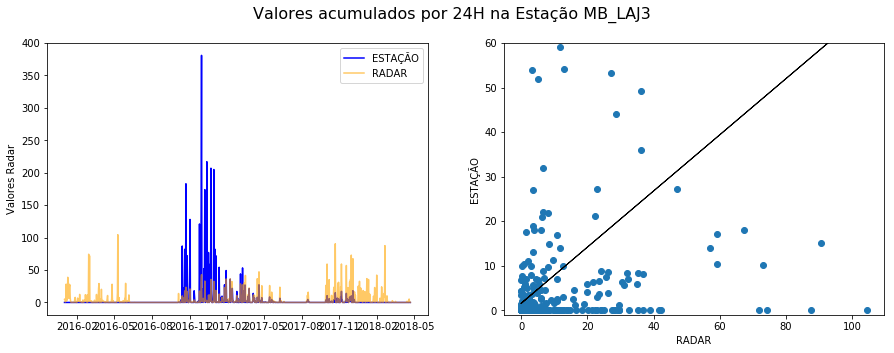

Coefficients: 
 [0.02046903]
Mean squared error: 0.98
R2 score: 0.05


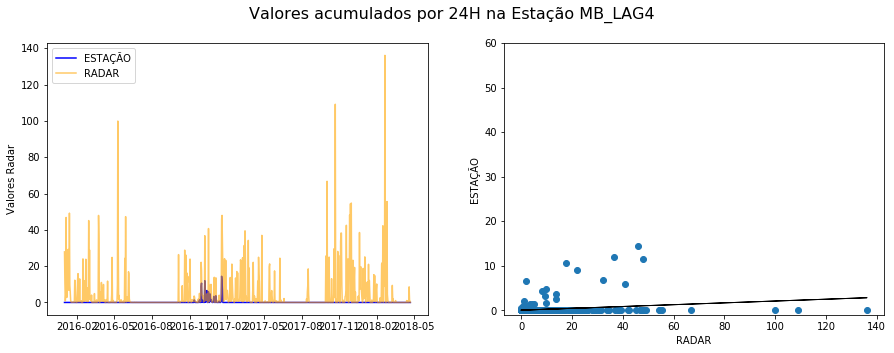

Coefficients: 
 [0.03448904]
Mean squared error: 0.47
R2 score: 0.21


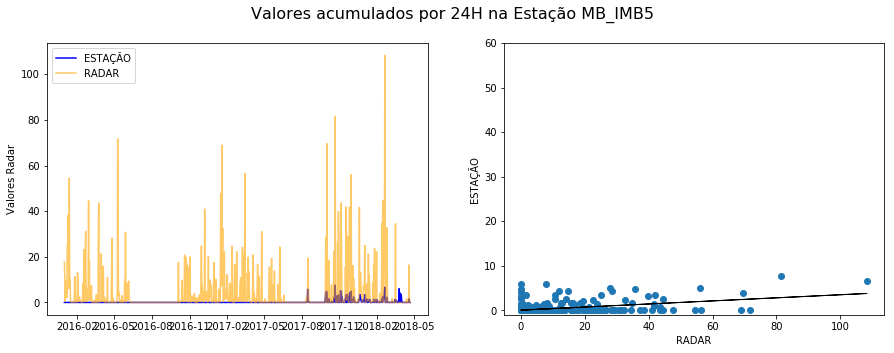

Coefficients: 
 [0.25679567]
Mean squared error: 29.78
R2 score: 0.20


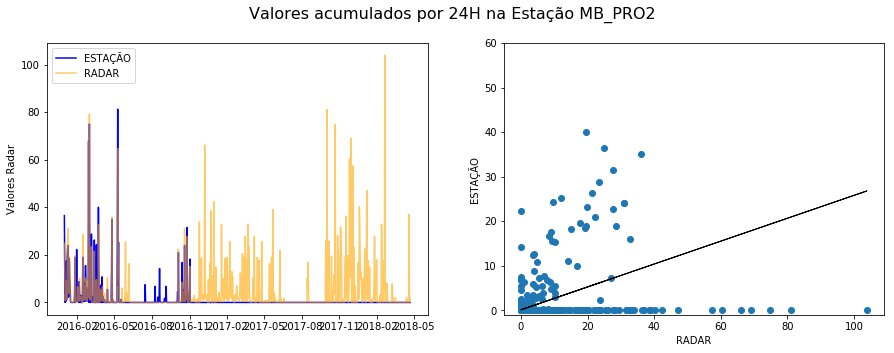

Coefficients: 
 [-0.]
Mean squared error: 0.00
R2 score: 1.00


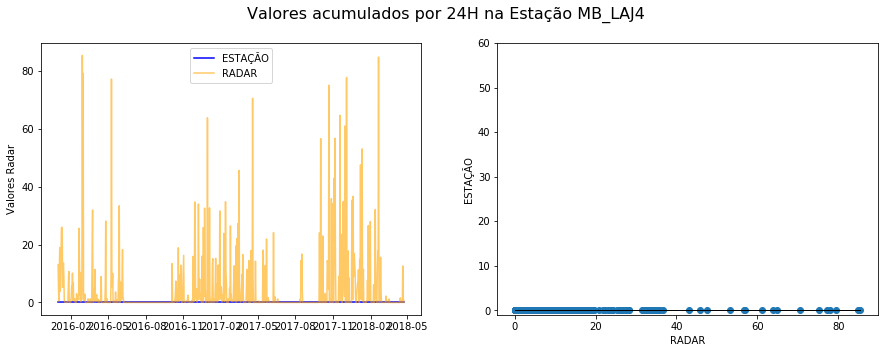

Coefficients: 
 [1.26931461]
Mean squared error: 101505.13
R2 score: 0.00


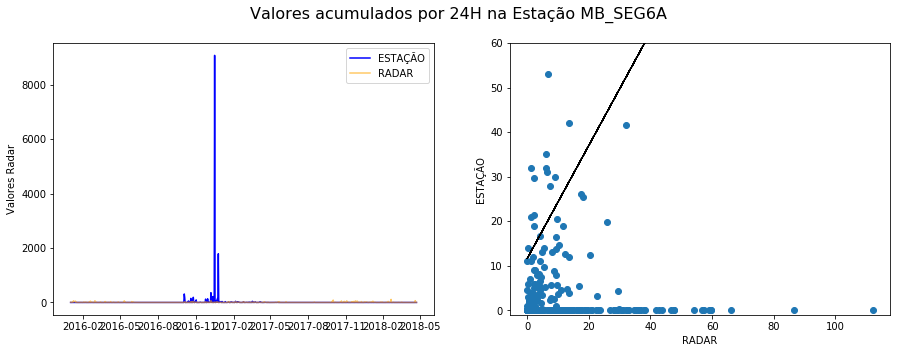

Coefficients: 
 [0.6328116]
Mean squared error: 354.50
R2 score: 0.10


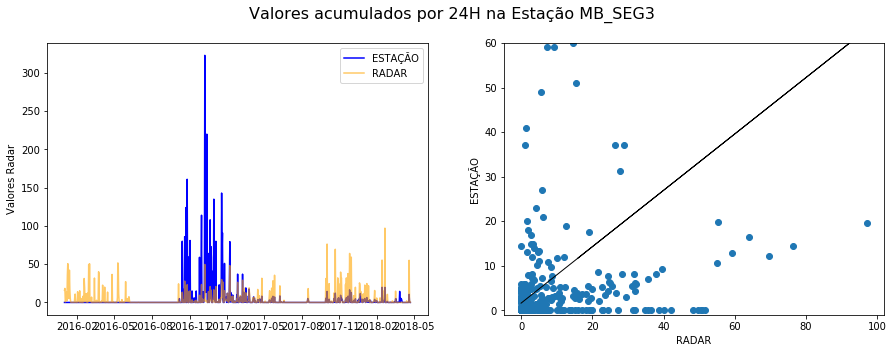

Coefficients: 
 [0.07763557]
Mean squared error: 3.98
R2 score: 0.13


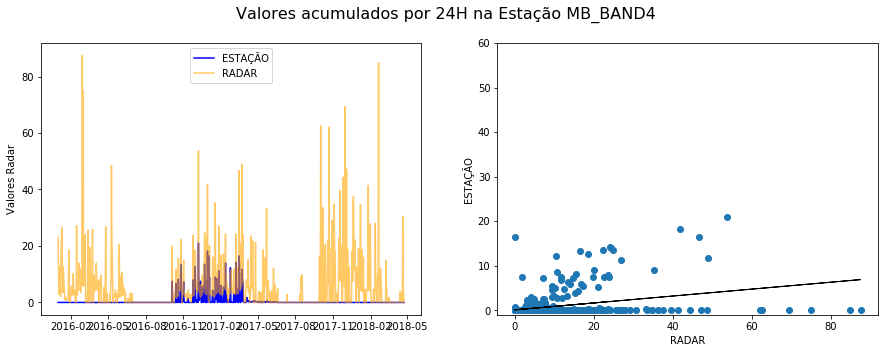

Coefficients: 
 [0.14347715]
Mean squared error: 37.54
R2 score: 0.06


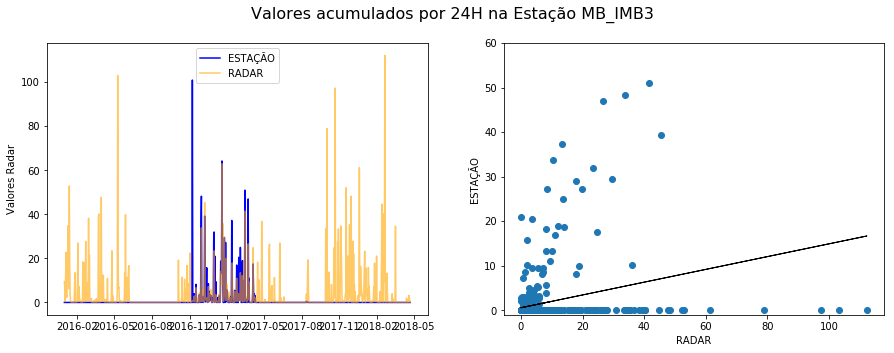

Coefficients: 
 [0.09250909]
Mean squared error: 18.41
R2 score: 0.05


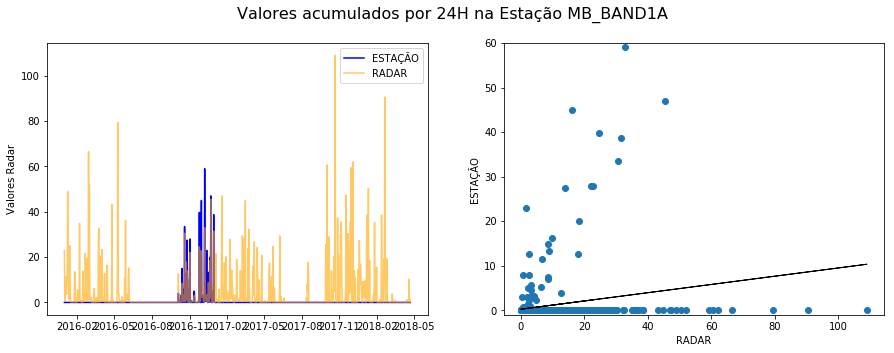

In [38]:
stations = [station for station in df_radar.columns if station in df_estacao.columns]
for station in stations:
    compare(station,"24H",df_estacao,df_radar)